In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Preprocessing

In [2]:
df=pd.read_csv('C:/Users/Rohan Sharma/Desktop/news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [6]:
df['label'].count()

6335

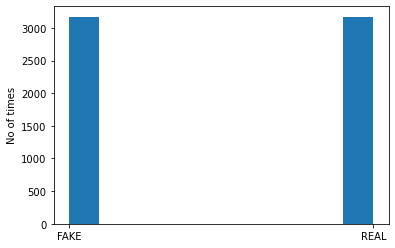

In [7]:
#visualization of count of both the labels
import matplotlib.pyplot as plt
x = df['label']
plt.hist(x)
plt.ylabel('No of times')
plt.show()

### Modelling

In [8]:
#getting the labels
lbl=df.label
lbl.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [9]:
#splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], lbl, test_size=0.2, random_state=42)

In [10]:
#dealing with stopwords
tfidf=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf.fit_transform(x_train) 
tfidf_test=tfidf.transform(x_test)

In [11]:
#using passive classifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [12]:
#prediction
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.37%


Accuracy achieved by the model is approx 93%

In [13]:
#confusion matrix 
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[587,  41],
       [ 43, 596]], dtype=int64)

In [14]:
import pickle
Pkl_Filename = "fakenews.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(pac, file)